In [35]:
#Imports
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import folium

In [34]:
# Methods
def unpack_column(dataFrame,col_name):
    newDf = dataFrame.from_records(dataFrame[col_name].dropna().tolist())
    return newDf

def unpack_and_destroy(dataFrame,column):
    temp = unpack_column(dataFrame,column)
    for col in temp.columns:
        dataFrame[col] = temp[col]
    #dataFrame = dataFrame.drop(columns=[column])
    return dataFrame

def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

def freq_array(freq_list):
    freq = []
    for i in freq_list:
        freq.append(i)
    return freq

def set_labels(freq, ax,horz_shift=.2,vert_shift=1000,w="bold",fsize=10,c="b"):
    for i, v in enumerate(freq):
        ax.text(i-horz_shift,v+vert_shift, str(round(v,2)), weight = w,fontsize=fsize,color = c)
        
def wrap_axis_labels(labels_list,wrap_length=13):
    labels_list = [ '\n'.join(wrap(l, wrap_length)) for l in labels_list]
    return labels_list


In [3]:
irs_db = pd.read_csv('Data/eo1.csv')

In [4]:
irs_db.head(5)

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN


In [5]:
irs_db = irs_db[irs_db["DEDUCTIBILITY"] == 1]

In [6]:
irs_db.sort_values(by = "GROUP", ascending = False).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
119093,222789192,MAINEGENERAL HEALTH,% JEREMY STORER,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,9,...,8,8,1,0,6,NaN,NaN,NaN,P70Z,NaN
182409,455473855,MAINEGENRAL MEDICAL CENTER,% MAINEGENERAL MEDICAL CENTER SOLE,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,9,...,0,0,1,0,6,NaN,NaN,NaN,NaN,KENNEBEC RISK LLC
2946,10524384,MAINEGENERAL HEALTH,% ALAN SANFORD,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,9,...,7,8,2,0,6,NaN,NaN,NaN,E90,MAINEGENERAL COMMUNITY CARE
24631,43369649,MAINEGENERAL HEALTH,NaN,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,6,...,8,8,1,0,6,32158014.0,11140754.0,10708435.0,E22,NaN
168423,320265031,MAINEGENERAL HEALTH,% JEREMY STORER,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,9,...,9,9,3,0,6,641376200.0,557182635.0,524087029.0,NaN,GROUP RETURN


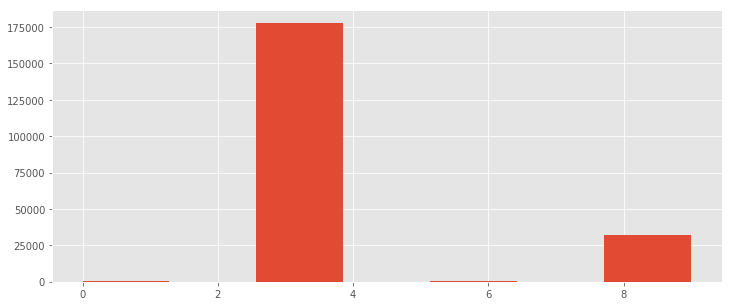

In [7]:
irs_db["AFFILIATION"].hist(figsize = (12,5), bins = 7) ;

In [8]:
irs_db.sort_values(by = "FOUNDATION", ascending = True).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
136652,237092938,AMERICAN LEGION AUXILIARY,% PAULETTE BOCASH,1272 MAIN ST,SHELDON,VT,05483-9739,964,19,9,...,0,0,2,0,12,0.0,0.0,0.0,NaN,88 SHELDON SPRINGS
134266,232433600,ANCIENT ORDER OF HIBERNIANS LADIES,% ELLE MCCRANE,2109 HOMECREST AVE,BROOKLYN,NY,11229-4111,0,10,3,...,0,0,2,0,12,0.0,0.0,0.0,NaN,RAE DISPALDO
40730,61450082,SONS OF ITALY IN AMERICA,% DAN CASTRICANE,PO BOX 2021,TUXEDO,NY,10987-0000,3610,8,9,...,3,3,2,0,9,30957.0,25894.0,25894.0,NaN,1353 HENRY H ROGERS-CABRINI
115974,222537290,ST JOHNSBURY CHAPT 1021 WOMEN OF THE MOOSE,% SUSAN M MACKAY,PO BOX 262,ST JOHNSBURY,VT,05819-0262,2,8,9,...,0,0,2,0,4,0.0,0.0,0.0,NaN,1021
154065,264469004,ORDER OF AHEPA,% EMMANUEL MOSHOVOS,14 B HARTUNG PLACE,OLD LYME,CT,06371-2230,1466,8,9,...,0,0,2,0,12,0.0,0.0,0.0,NaN,7 DISTRICT


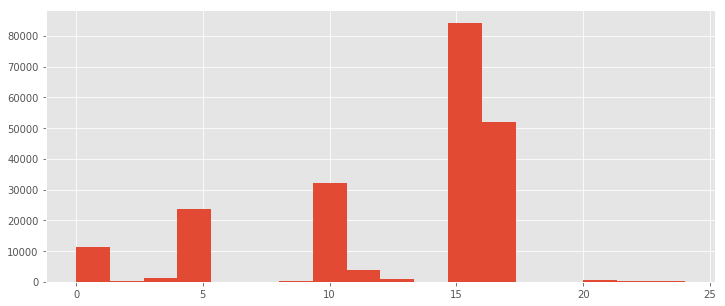

In [9]:
irs_db["FOUNDATION"].hist(figsize = (12,5), bins = 18) ;

In [10]:
sort_db_value(irs_db,"SUBSECTION", False).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
28488,46024391,ROBERT J EDWARDS TRUST U/W,% N E MERCHANTS NATL BANK,PO BOX 1802,PROVIDENCE,RI,02901-1802,0,92,3,...,4,4,0,1,12,479487.0,174899.0,NaN,NaN,NaN
75710,136084412,RODGERS & HAMMERSTEIN FOUNDATION,NaN,229 W 28TH ST FL 11,NEW YORK,NY,10001-5915,0,92,3,...,2,3,0,1,12,21512.0,32793.0,NaN,NaN,NaN
28347,46018681,DANIEL B WESSON TR 59-7057006,NaN,PO BOX 1802,PROVIDENCE,RI,02901-1802,0,92,3,...,5,4,0,1,12,762835.0,283086.0,NaN,NaN,NaN
12934,36004154,MOUNT LAUREL FOUNDATION INC,% JOHN ALEXOPOULOS,PO BOX 915,MANCHESTER,VT,05254-0915,0,92,3,...,5,4,0,1,6,692482.0,497100.0,NaN,NaN,NaN
43667,66026019,FULTON FUND,% FLEET PRIVATE CLIENTS GROUP,PO BOX 1802,PROVIDENCE,RI,02901-1802,0,92,3,...,5,4,0,1,6,728851.0,284339.0,NaN,NaN,NaN


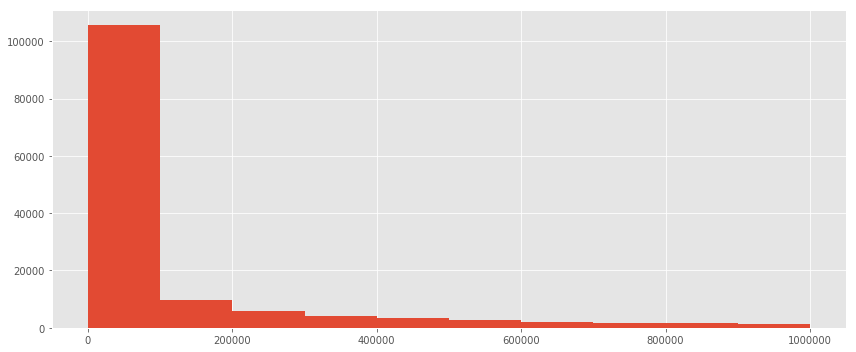

In [11]:
irs_db['ASSET_AMT'].hist(figsize = (12,5), range=[0, 1000000]) ;
plt.tight_layout()

In [12]:
sort_db_value(irs_db,"ASSET_CD", False).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
115550,222520918,COLTON FAMLIY FOUNDATION,% STUART COLTON,232 HARTSHORN DR,SHORT HILLS,NJ,07078-1914,0,3,3,...,9,9,0,1,11,56060290.0,61747686.0,NaN,NaN,NaN
157621,271414646,CLINTON HEALTH ACCESS INITIATIVE INC,% JULIE B FEDER,383 DORCHESTER AVE S400,BOSTON,MA,02127-2422,0,3,3,...,9,9,1,0,12,82858248.0,133248928.0,127550776.0,Q33,NaN
84787,150533561,HARTWICK COLLEGE,NaN,1 HARTWICK DR,ONEONTA,NY,13820-4000,0,3,3,...,9,9,1,0,6,156639158.0,90077682.0,72988713.0,B420,NaN
157585,271401401,GRACE FARMS FOUNDATION,% TOM MEDICO,365 LUKES WOOD RD,NEW CANAAN,CT,06840-0000,0,3,3,...,9,7,0,1,12,134954937.0,8675300.0,NaN,T23,NaN
163968,276377439,TANSY CHARITABLE FOUNDATION,% NEIL PIROZZI,1166 AVENUE OF THE AMERICAS 9TH FL,NEW YORK,NY,10036-2750,0,3,3,...,9,9,0,1,12,217197729.0,92877129.0,NaN,T20,ERIC WEPSIC TTEE


In [13]:
irs_db.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN


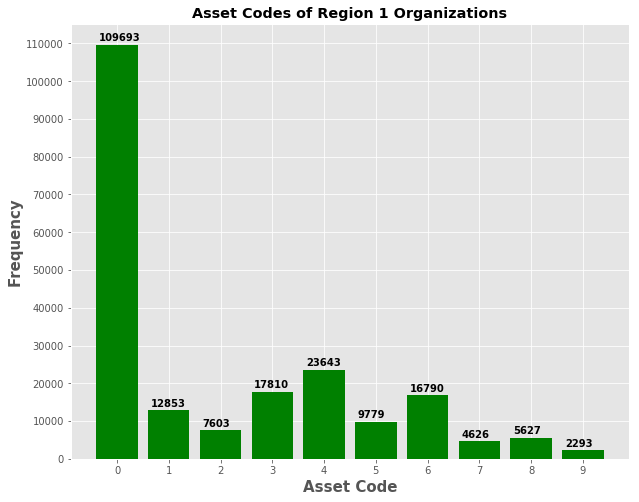

In [14]:
# Asset Code Bar Graph
p = irs_db.groupby("ASSET_CD").size()
freq = []
for i in p:
    freq.append(i)
fig,ax = plt.subplots(figsize = (10,8))
ax.bar(np.arange(10),freq, color = "g");
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(0,110001,10000))
ax.set_title("Asset Codes of Region 1 Organizations", weight = "bold")
ax.set_xlabel("Asset Code", fontsize=15, weight = "bold")
ax.set_ylabel("Frequency", fontsize=15, weight = "bold")

for i, v in enumerate(freq):
    ax.text(i-0.35,v+1000, str(v), weight = "bold")
    


In [16]:
irs_db = irs_db.drop(columns=['FILING_REQ_CD',"PF_FILING_REQ_CD","STATUS","NTEE_CD"])

In [17]:
irs_db_charities = irs_db[irs_db["AFFILIATION"]== 9]

In [18]:
irs_db_charities.sort_values(by="INCOME_AMT", ascending = False).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ACTIVITY,ORGANIZATION,TAX_PERIOD,ASSET_CD,INCOME_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,SORT_NAME
247719,900656139,PARTNERS HEALTHCARE SYSTEM INC,% TAX DEPARTMENT,399 REVOLUTION DR STE 645,SOMERVILLE,MA,02145-1465,5803,3,9,...,0,1,201709.0,9,9,9,1.669551e+10,1.271649e+10,1.271223e+10,AFFILIATES GROUP RETURN
249818,912154267,MEMORIAL SLOAN-KETTERING CANCER CENTER,% MARK K SVENNINGSON,1275 YORK AVE,NEW YORK,NY,10065-6007,3475,3,9,...,161180927,1,201712.0,9,9,12,1.063255e+10,5.130567e+09,4.499057e+09,GROUP RETURN
214532,651301877,ATLANTIC HEALTH SYSTEM INC,NaN,475 SOUTH STREET ACCTG 920,MORRISTOWN,NJ,07960-0000,9704,3,9,...,36029265,1,201712.0,9,9,12,3.394267e+09,2.681564e+09,2.636178e+09,GROUP RETURN
3699,10649794,HACKENSACK MERIDIAN HEALTH INC,% ROBERT L GLENNING,C/O TAX DEPT 1350 CAMPUS PARKWAY,NEPTUNE,NJ,07753-0000,3827,3,9,...,0,1,201712.0,9,9,12,3.503673e+09,2.579159e+09,2.567369e+09,GROUP RETURN
249824,912155626,UMASS MEMORIAL HEALTH CARE INC,% ROBERT FELDMANN,306 BELMONT ST,WORCESTER,MA,01604-1004,3642,3,9,...,0,1,201709.0,9,9,9,1.879642e+09,2.492357e+09,2.454599e+09,GROUP RETURN


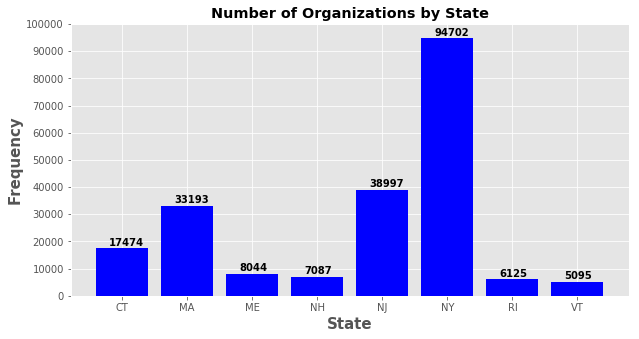

In [19]:
# State Count Bar Graph
state_df_count = irs_db.groupby("STATE").size()
states = list(state_df_count.index.values)
freq = []
for i in state_df_count:
    freq.append(i)
fig,ax = plt.subplots(figsize = (10,5))
ax.bar(states,freq, color = "b");
ax.set_yticks(np.arange(0,100001,10000)) ;
ax.set_title("Number of Organizations by State", weight = "bold");
ax.set_xlabel("State", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

for i, v in enumerate(freq):
    ax.text(i-.2,v+1000, str(v), weight = "bold")


In [20]:
asset_df = irs_db[irs_db["ASSET_CD"]>0] 

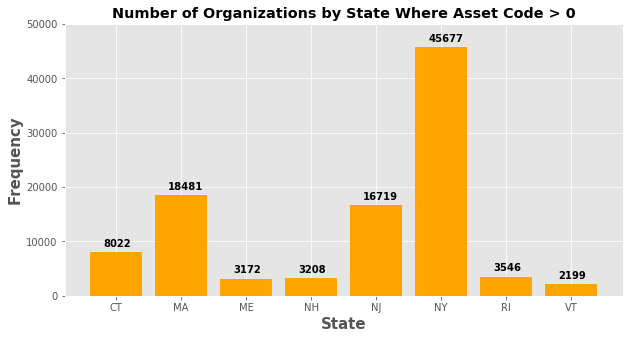

In [21]:
# State Count Bar Graph
state_df_count = asset_df.groupby("STATE").size()
states = list(state_df_count.index.values)
freq = []
for i in state_df_count:
    freq.append(i)
fig,ax = plt.subplots(figsize = (10,5))
ax.bar(states,freq, color = "orange");
ax.set_yticks(np.arange(0,np.max(state_df_count)+10000,10000)) ;
ax.set_title("Number of Organizations by State Where Asset Code > 0", weight = "bold");
ax.set_xlabel("State", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

for i, v in enumerate(freq):
    ax.text(i-.2,v+1000, str(v), weight = "bold")

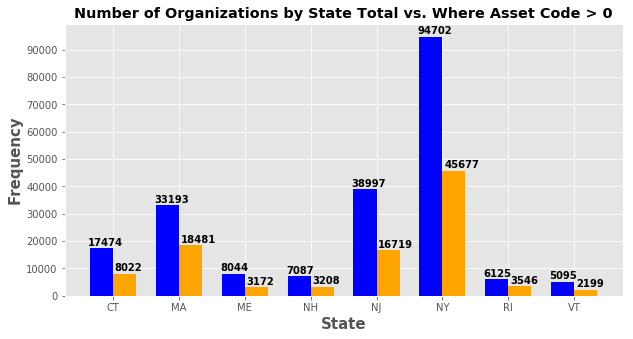

In [32]:
# State Count Bar Graph
state_df_count = irs_db.groupby("STATE").size()
states = list(state_df_count.index.values)

ind = np.arange(8) 

freq = freq_array(state_df_count)
    
fig,ax = plt.subplots(figsize = (10,5),sharex=True)
ax.bar(ind,freq, color = "b",width=0.35);
ax.set_yticks(np.arange(0,np.max(state_df_count)+10000,10000)) ;
ax.set_title("Number of Organizations by State", weight = "bold");
ax.set_xlabel("State", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq,ax,.2,1000)
    
# State Count Bar Graph
state_df_count_2 = asset_df.groupby("STATE").size()

freq_2 = freq_array(state_df_count_2)
    
ax.bar(ind+.35,freq_2, color = "orange",width=0.35);
#ax.set_yticks(np.arange(0,np.max(state_df_count)+10000,10000)) ;
ax.set_title("Number of Organizations by State Total vs. Where Asset Code > 0", weight = "bold");
ax.set_xlabel("State", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(freq_2,ax,-.2,1000)

ax.set_xticks(ind + .35 / 2)
ax.set_xticklabels(states);

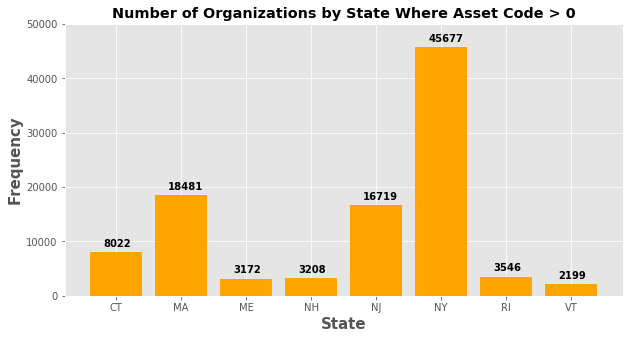

In [23]:
# State Count Bar Graph
state_df_count = asset_df.groupby("STATE").size()
states = list(state_df_count.index.values)

freq = freq_array(state_df_count)

fig,ax = plt.subplots(figsize = (10,5))
ax.bar(states,freq, color = "orange");
ax.set_yticks(np.arange(0,np.max(state_df_count)+10000,10000)) ;
ax.set_title("Number of Organizations by State Where Asset Code > 0", weight = "bold");
ax.set_xlabel("State", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

set_labels(state_df_count,ax)


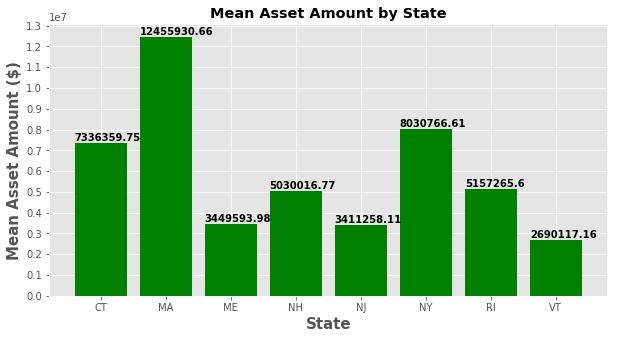

In [24]:
# State Count Bar Graph
state_df_count = irs_db.groupby("STATE")["ASSET_AMT"].mean()
states = list(state_df_count.index.values)

freq = freq_array(state_df_count)

fig,ax = plt.subplots(figsize = (10,5))
ax.bar(states,freq, color = "green");
ax.set_yticks(np.arange(0,np.max(state_df_count)+1000000,1000000)) ;
ax.set_title("Mean Asset Amount by State", weight = "bold");
ax.set_xlabel("State", fontsize=15, weight = "bold");
ax.set_ylabel("Mean Asset Amount ($)", fontsize=15, weight = "bold");

set_labels(state_df_count,ax,.4,100000);


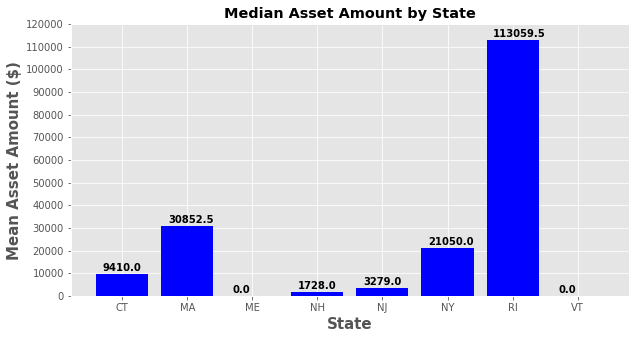

In [25]:
# State Count Bar Graph
state_df_count = irs_db.groupby("STATE")["ASSET_AMT"].median()
states = list(state_df_count.index.values)

freq = freq_array(state_df_count)

fig,ax = plt.subplots(figsize = (10,5))
ax.bar(states,freq, color = "blue");
ax.set_yticks(np.arange(0,np.max(state_df_count)+10000,10000))
ax.set_title("Median Asset Amount by State", weight = "bold");
ax.set_xlabel("State", fontsize=15, weight = "bold");
ax.set_ylabel("Mean Asset Amount ($)", fontsize=15, weight = "bold");

set_labels(state_df_count,ax,.3,1500);

In [26]:
np.max(irs_db.groupby("STATE")["ASSET_AMT"].median())

113059.5

In [27]:
irs_db.shape

(210717, 24)

In [53]:
# x = irs_db.groupby("STATE",as_index=False).size()
x = irs_db.groupby("STATE").size().reset_index(name="Count")
x

,STATE,Count
0,CT,17474
1,MA,33193
2,ME,8044
3,NH,7087
4,NJ,38997
5,NY,94702
6,RI,6125
7,VT,5095


In [36]:
my_USA_map = "Data/us-states.json"

In [38]:
map = folium.Map(location=[48, -102], zoom_start=3)

In [54]:
map.choropleth(geo_data=my_USA_map, data=x,
             columns=['STATE', 'Count'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Participation Rate (%)')
map

In [57]:
import plotly.graph_objects as go

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()